#2η ομαδική άσκηση στη Τεχνολογία και Ανάλυση Εικόνων και Βίντεο

Φαρδέλας Ιωάννης  03113190

Παραλίκας Ηλίας 03116605

## Θεωρητικό Μέρος

**Περιγράψτε τη λειτουργία της Rectified Linear Unit (ReLU).**


Η **συνάρτηση ενεργοποίησης Rectified Linear Unit (ReLU)**, δίνεται από τη σχέση:

$$
f \left( z \right) = max \left( 0, z \right)
$$
<img src="https://miro.medium.com/max/1026/0*g9ypL5M3k-f7EW85.png" width=40%>

Η ReLU αποτελεί μια διαδικασία εφαρμογής μιας συνάρτησης ενεργοποίησης για την αύξηση της μη γραμμικότητας του δικτύου χωρίς να επηρεάζονται τα πεδία υποδοχής των συνελικτικών επιπέδων.\
Η ReLU επιτρέπει την ταχύτερη εκπαίδευση των δεδομένων και δεν απαιτεί κανονικοποίηση εισόδου για να αποτρέψουν τον κορεσμό. Η χρήση της ReLU που προσφέρει μη γραμμικότητα, βοηθά να εκπαιδευτούν βαθιά εποπτευόμενα συνελικτικά δίκτυα, χωρίς να απαιτείται προεκπαίδευση χωρίς επίβλεψη.  \
Ο λόγος που επιλέγουμε αυτή είναι κυρίως η απλότητά της που μας γλιτώνει από τον επιπλέον υπολογιστικό φόρτο μίας πιο σύνθετης συνάρτησης ενεργοποίησης.

**Παρουσιάστε ένα συγκριτικό πίνακα με τα επίπεδα, το μέγεθος των φίλτρων, συνάρτηση ενεργοποίησης, πλήθος παραμέτρων και τεχνικές pooling και dropout που χρησιμοποιούν τα 3 διαφορετικά δίκτυα που παρουσιάζονται στα προαναφερθέντα άρθρα και σχολιάστε επαρκώς τις διαφορές τους. Ποια χαρακτηριστικά αυτών των τριών δικτύων είναι κατά τη γνώμη σας αυτά που συνέβαλαν στη σταδιακή αύξηση της ακρίβειας ταξινόμησης.**

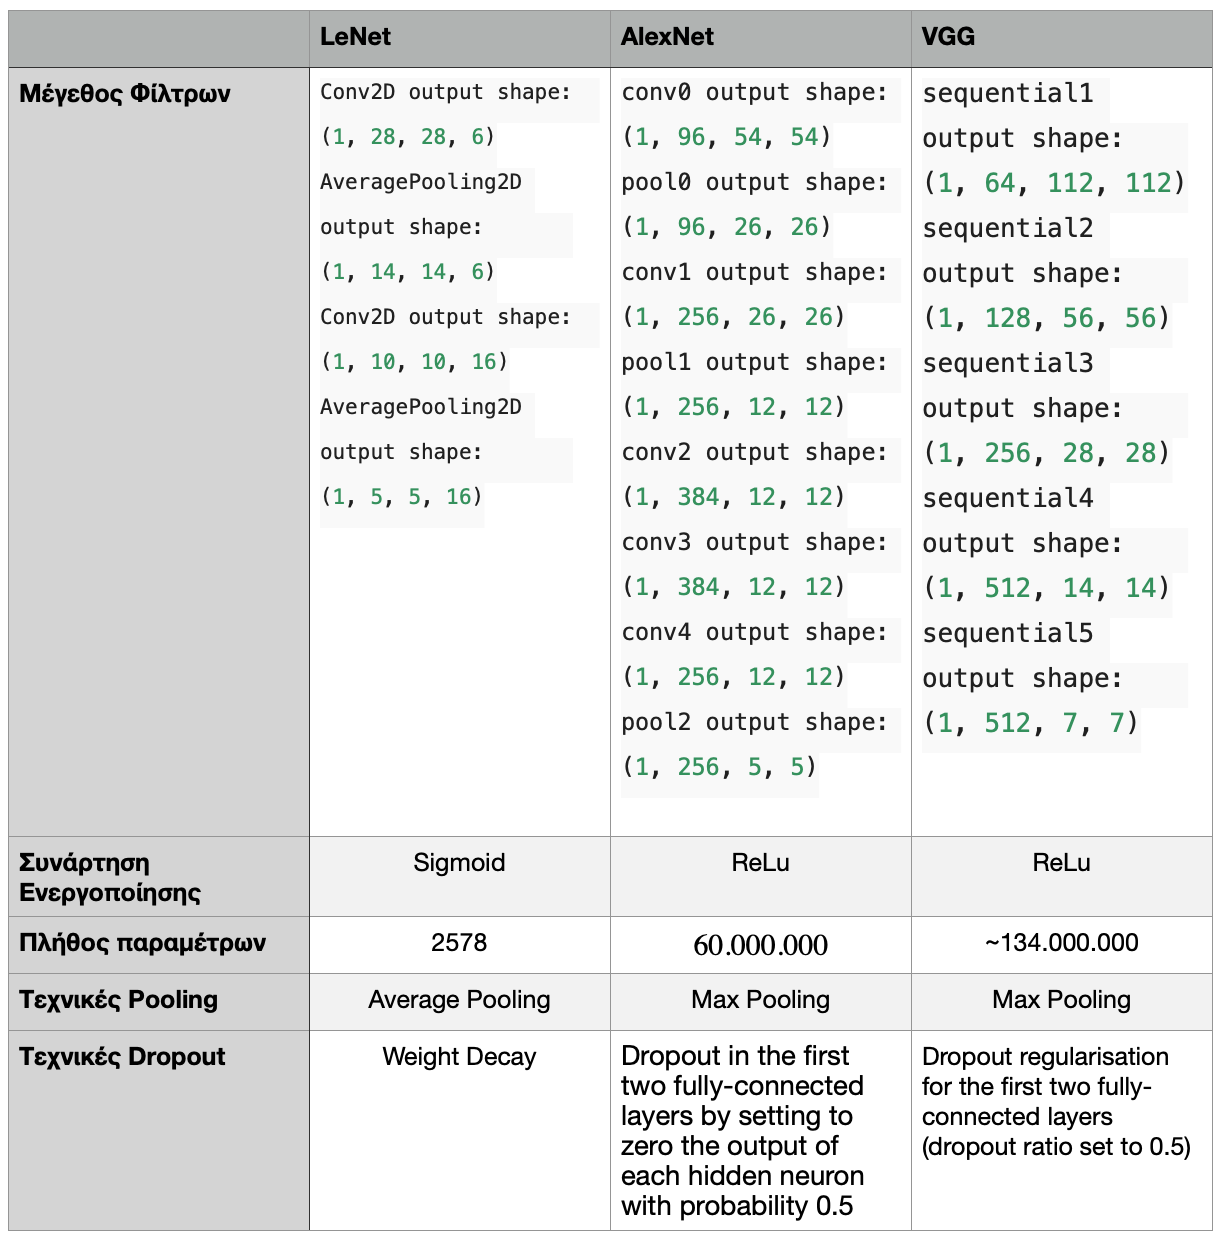 Παρατηρούμε ότι τα δυό μεταγενέστερα μοντέλα, χρησιμοποιούν συνάρτηση ενεργοποίησης ReLU που δεν είχε ανακαλυφθεί την εποχή όπου δημιουργήθηκε το πρώτο μοντέλο (LeNet), και η οποία συνεισφέρει στη γρηγορότερη εκπαίδευση των δεδομένων.\
Επιπλέον, όσο πιο πρόσφατο είναι το μοντέλο, τόσο μεγαλύτερο είναι το πλήθος των παραμέτρων που χρησιμοποιεί (ξεκινώντας από 2578 στο LeNet έως 134 εκατομμύρια στο VGG), γεγονός που συνεισφέρει στην αύξηση της ακρίβειας ταξινόμησης.\
Όσον, αφορά στα Pooling Layers, την εποχή του μοντέλου LeNet, δεν υπήρχαν ακόμη τεχνικές Max Pooling, ενώ στα πιο πρόσφατα μοντέλα η χρήση αυτής της τεχνικής συμβάλλει επίσης στην αύηση της ακρίβειας.\
Τέλος, οι πιο εξελιγμένες τεχνικές Dropout, στα δύο μεταγενέστερα μοντέλα, έναντι του πρώτου, βοηθούν στην αποφυγή του overfitting, και άρα συμβάλλουν στην καλύτερη γενίκευση των μοντέλων.

## Υλοποίηση Αλγορίθμου


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)


In [ ]:
# load the entire dataset
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

In [ ]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Η κάθε ομάδα θα δουλέψει με διαφορετικό υποσύνολο του dataset.
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό που αντιστοιχεί στην ομάδας σας. 

In [ ]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 99

In [ ]:
# select from CIFAR100 20 classes
cifar100_classes_url = "https://pastebin.com/raw/nzE1n98V"

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [ ]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [ ]:
# print our classes
print(our_classes)

[' aquarium_fish', ' camel', ' castle', ' caterpillar', ' chair', ' couch', ' forest', ' motorcycle', ' poppy', ' possum', ' rabbit', ' skunk', ' sunflower', ' sweet_pepper', ' table', ' telephone', ' trout', ' tulip', ' whale', ' willow_tree']


In [ ]:
print(x_train_ds[1].shape)

(32, 32, 3)


Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


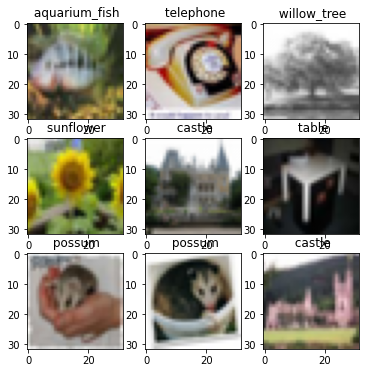

In [ ]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

## Ερώτημα 1
---
#### Βήμα 1: Σχεδίαση, μεταγλώττιση και εκπαίδευση των μοντέλων

 1. Σχεδίαστε, μεταγλωττίστε και εκπαιδεύστε τα μοντέλα  **LeNet, AlexNet και  VGG**, καθώς και ένα δικό σας μοντέλο (ονομάστε το π.χ. **MyCNN**) χρησιμοποιώντας διαφορετικούς συνδυασμούς (τουλάχιστον 2 ανά μοντέλο) για [optimizer](https://keras.io/api/optimizers/), [loss](https://keras.io/api/losses/), batch size και epoch.  Για [metrics](https://keras.io/api/metrics/) να χρησιμοποιήσετε την ορθότητα (όπως στο Lab8.1).
---
  
#### Βήμα 2: Αξιολόγηση των μοντέλων

1. Για κάθε ένα από τα μοντέλα που εκπαιδεύσατε, απεικονίστε σε κοινό διάγραμμα την ορθότητα εκπαίδευσης και την ορθότητα επικύρωσης στο σύνολο των εποχών, για κάθε διαφορετικό συνδυασμό του βήματος 1 και επιλέξτε αυτό με την καλύτερη ορθότητα από κάθε μοντέλο (ένα από κάθε αρχιτεκτονική, συνολικά 4).
2. Για κάθε ένα από τα μοντέλα με την καλύτερη ορθότητα (συνολικά **4**), απεικονίστε σε κοινό διάγραμμα την ορθότητα εκπαίδευσης και την ορθότητα επικύρωσης στο σύνολο των εποχών.
3. Αξιολογήστε, αναλυτικά, τα αποτελέσματά σας ως προς τα εξής:
 - Επίδραση του πλήθους των δεδομένων/κλάσεων στην απόδοση του μοντέλου
 - Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer)
 - Επίδραση του μεγέθους δέσμης (batch size)
 
---

#### Βήμα 3: Αξιολόγηση ορθότητας
Αξιολογήστε την ορθότητα για το test set σας.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pickle

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

foldername= "drive/MyDrive/mpinteo/"

if not os.path.exists(foldername):
    os.makedirs(foldername)

### Βήμα 1:

### Helper function

Map classes from 1 to 20

In [ ]:
#https://www.w3schools.com/python/ref_list_sort.asp
def unique(list1):
    # initialize a null list
    unique_list = []
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)

    return unique_list

In [ ]:
unique_classes = [x[0] for x in unique(y_test)]

In [ ]:
unique_classes.sort()

In [ ]:
class_dict = {}
for count,cls in enumerate(unique_classes):
  class_dict[cls] = count

In [ ]:
def resize_labels(ys):
  new_ys =[]
  for y in ys:
    new_ys.append([class_dict[y[0]]])
  return np.array(new_ys)

In [ ]:
resized_y_train = resize_labels(y_train)
resized_y_val = resize_labels(y_val)
resized_y_test = resize_labels(y_test)

In [ ]:
def compile_evaluate(model,model_name,epochs,batch_size,optimizer,loss,trial,ax):

  model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])

  history = model.fit(x_train, resized_y_train, epochs=epochs, batch_size=batch_size,
                      validation_data=(x_val, resized_y_val),verbose=0)
  
  ax.plot(history.history['accuracy'], label='accuracy')
  ax.plot(history.history['val_accuracy'], label = 'val_accuracy')
  
  ax.set_ylabel('Accuracy')
  ax.set_xlabel('Epochs')
  ax.axis(ymin=0,ymax=1)
  ax.legend(loc='lower right')
  ax.set_title("Trial : "+str(trial),fontsize=10,pad=20)

# store the parameters
  history.history['parameters'] ={"Epochs" : epochs   ,
                        "Batch size":batch_size,
                        "Optimizer":optimizer,
                        "Loss": loss}

  test_loss, test_accuracy = model.evaluate(x_test, resized_y_test, verbose=0)

  history.history['test_loss'] = test_loss
  history.history['test_accuracy'] = test_accuracy

  # see the path in drive, create it if it does not exist
  path = foldername +model_name
  if not os.path.exists(path):
    os.makedirs(path)
  file = path+'/'+model_name + '_' +str(trial) +'.pkl'
  with open(file, 'wb') as fp:
     pickle.dump(history.history, fp) 


### Parameters

cmobine the given parameters

In [ ]:
def create_params(epochs,batch_size,optimizers,loss):
  trial= 0
  parameters = []
  for epoch in epochs:
    for batch in batch_size:
      for opt in optimizers:
        for l in loss:
          param = {}
          trial = trial+1
          param['epochs'] = epoch
          param['batch_size'] = batch
          param['optimizer'] = opt
          param['loss'] = l
          param['trial'] = trial
          parameters.append(param)

  return  parameters

In [ ]:
epochs = [40]
batch_size =[16,64]
optimizers = ['adam','sgd']
loss = [tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),"mse"]

#parameters
parameters = create_params(epochs,batch_size,optimizers,loss)

In [ ]:
def cross_validation(model_generator,model_name,parameters):
  plot_x = len(parameters)

  figure, axis = plt.subplots(plot_x,constrained_layout=True,figsize=(15,5*plot_x))
  for count, p in enumerate(parameters):
    compile_evaluate(model_generator(),model_name,p['epochs'],p['batch_size'],p['optimizer'],p['loss'],p['trial'],axis[count])

  plt.show()

#### LeNet

In [ ]:
def leNet():
    return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid',padding='same'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=16, kernel_size=5,activation='sigmoid'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='sigmoid'),
        tf.keras.layers.Dense(84, activation='sigmoid'),
        tf.keras.layers.Dense(20)])

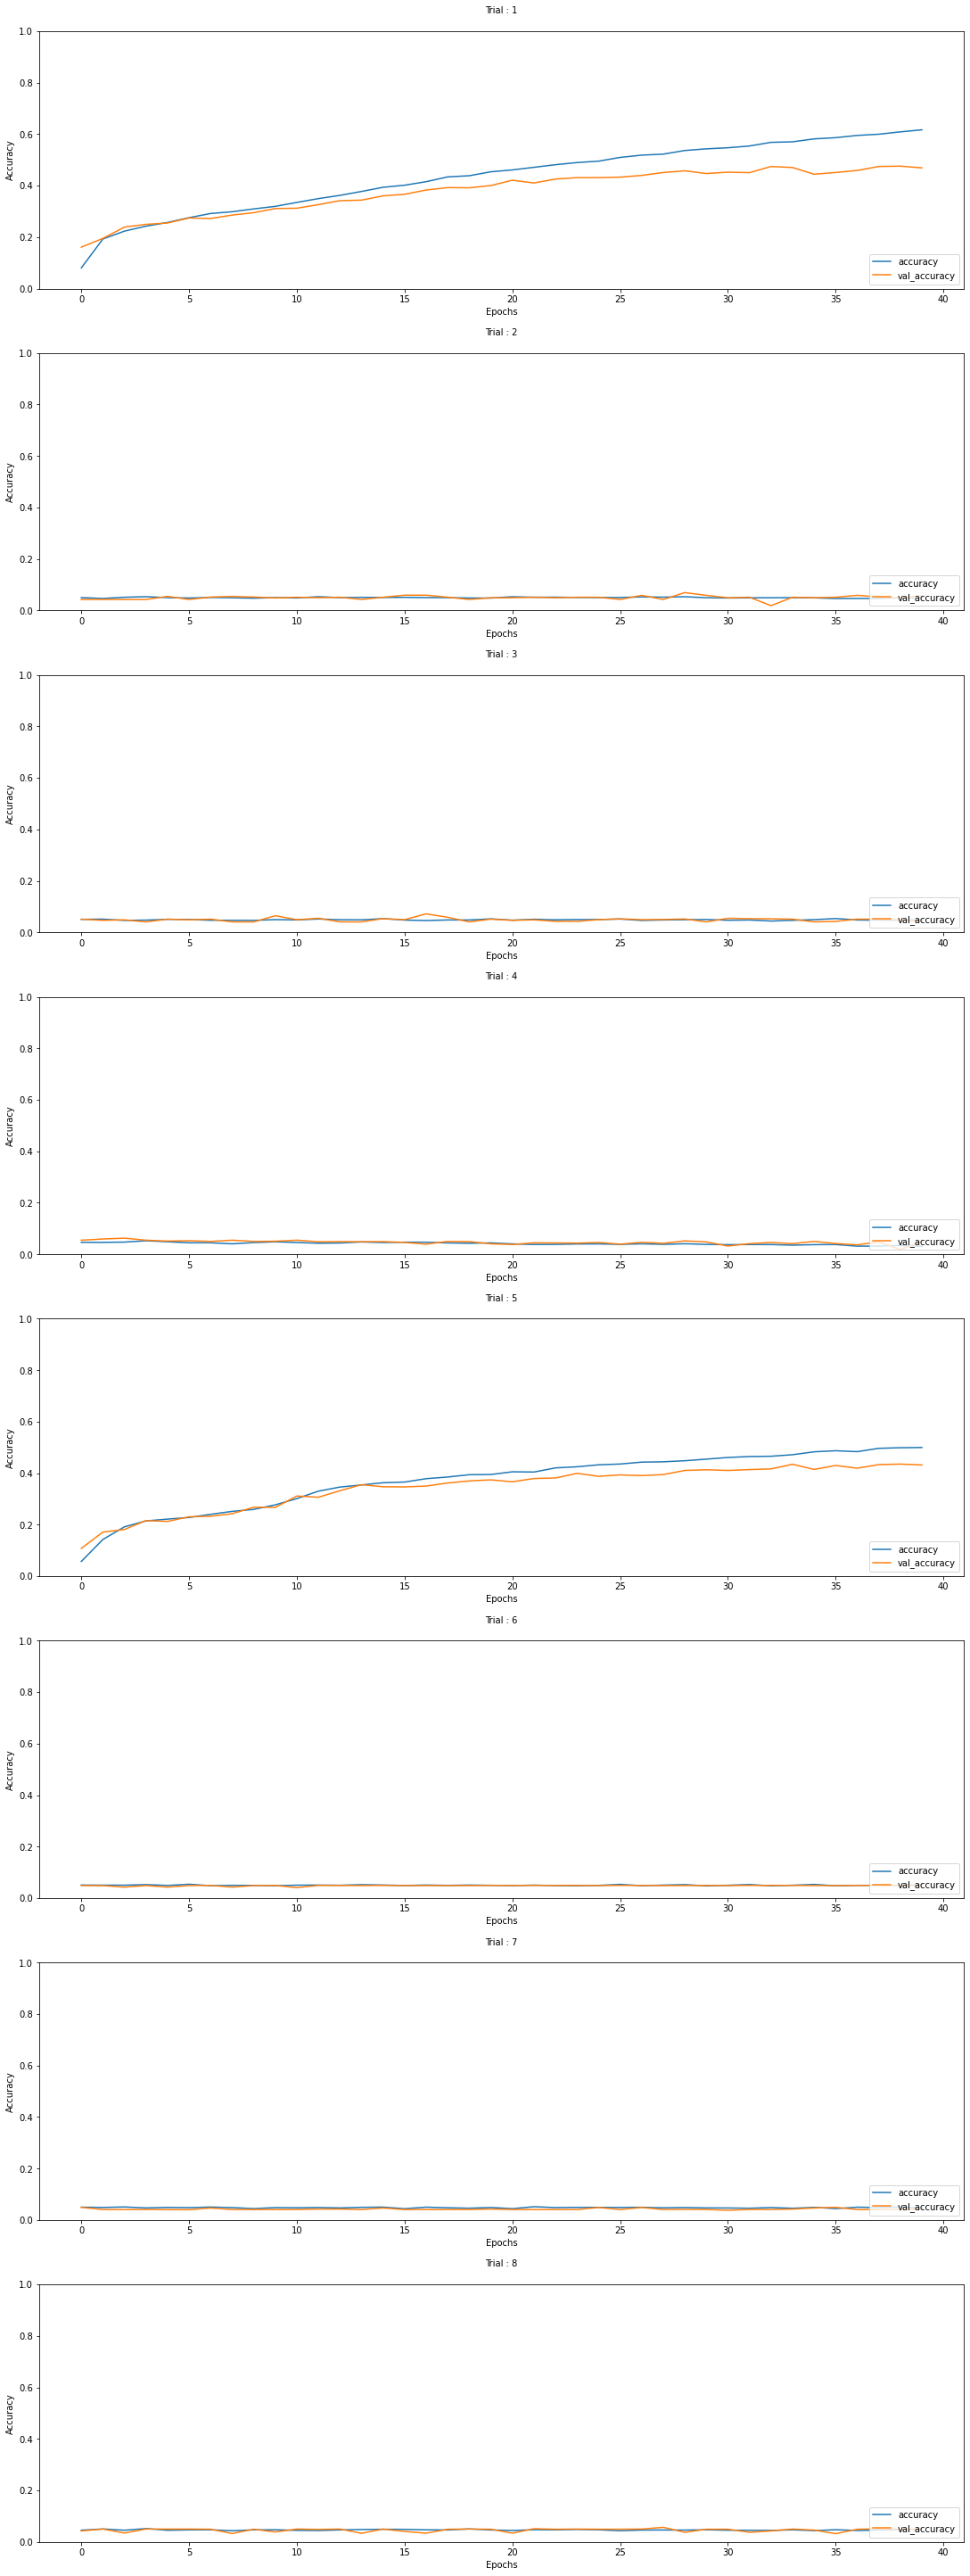

In [ ]:
cross_validation(leNet,"leNet",parameters)

#### AlexNet

In [ ]:
def alexNet():
    return tf.keras.models.Sequential([
        #αλλάξαμε τα strides απο 4 & 2 στα δύο πρώτα layers σε 1 γιατί είχαμε πολύ μικρότερη εικόνα απο
        tf.keras.layers.Conv2D(filters=96, kernel_size=11, strides=1,activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=1),
        tf.keras.layers.Conv2D(filters=256, kernel_size=5, padding='same',activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same',activation='relu'),
        tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same',activation='relu'),
        tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same',activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(20)
    ])

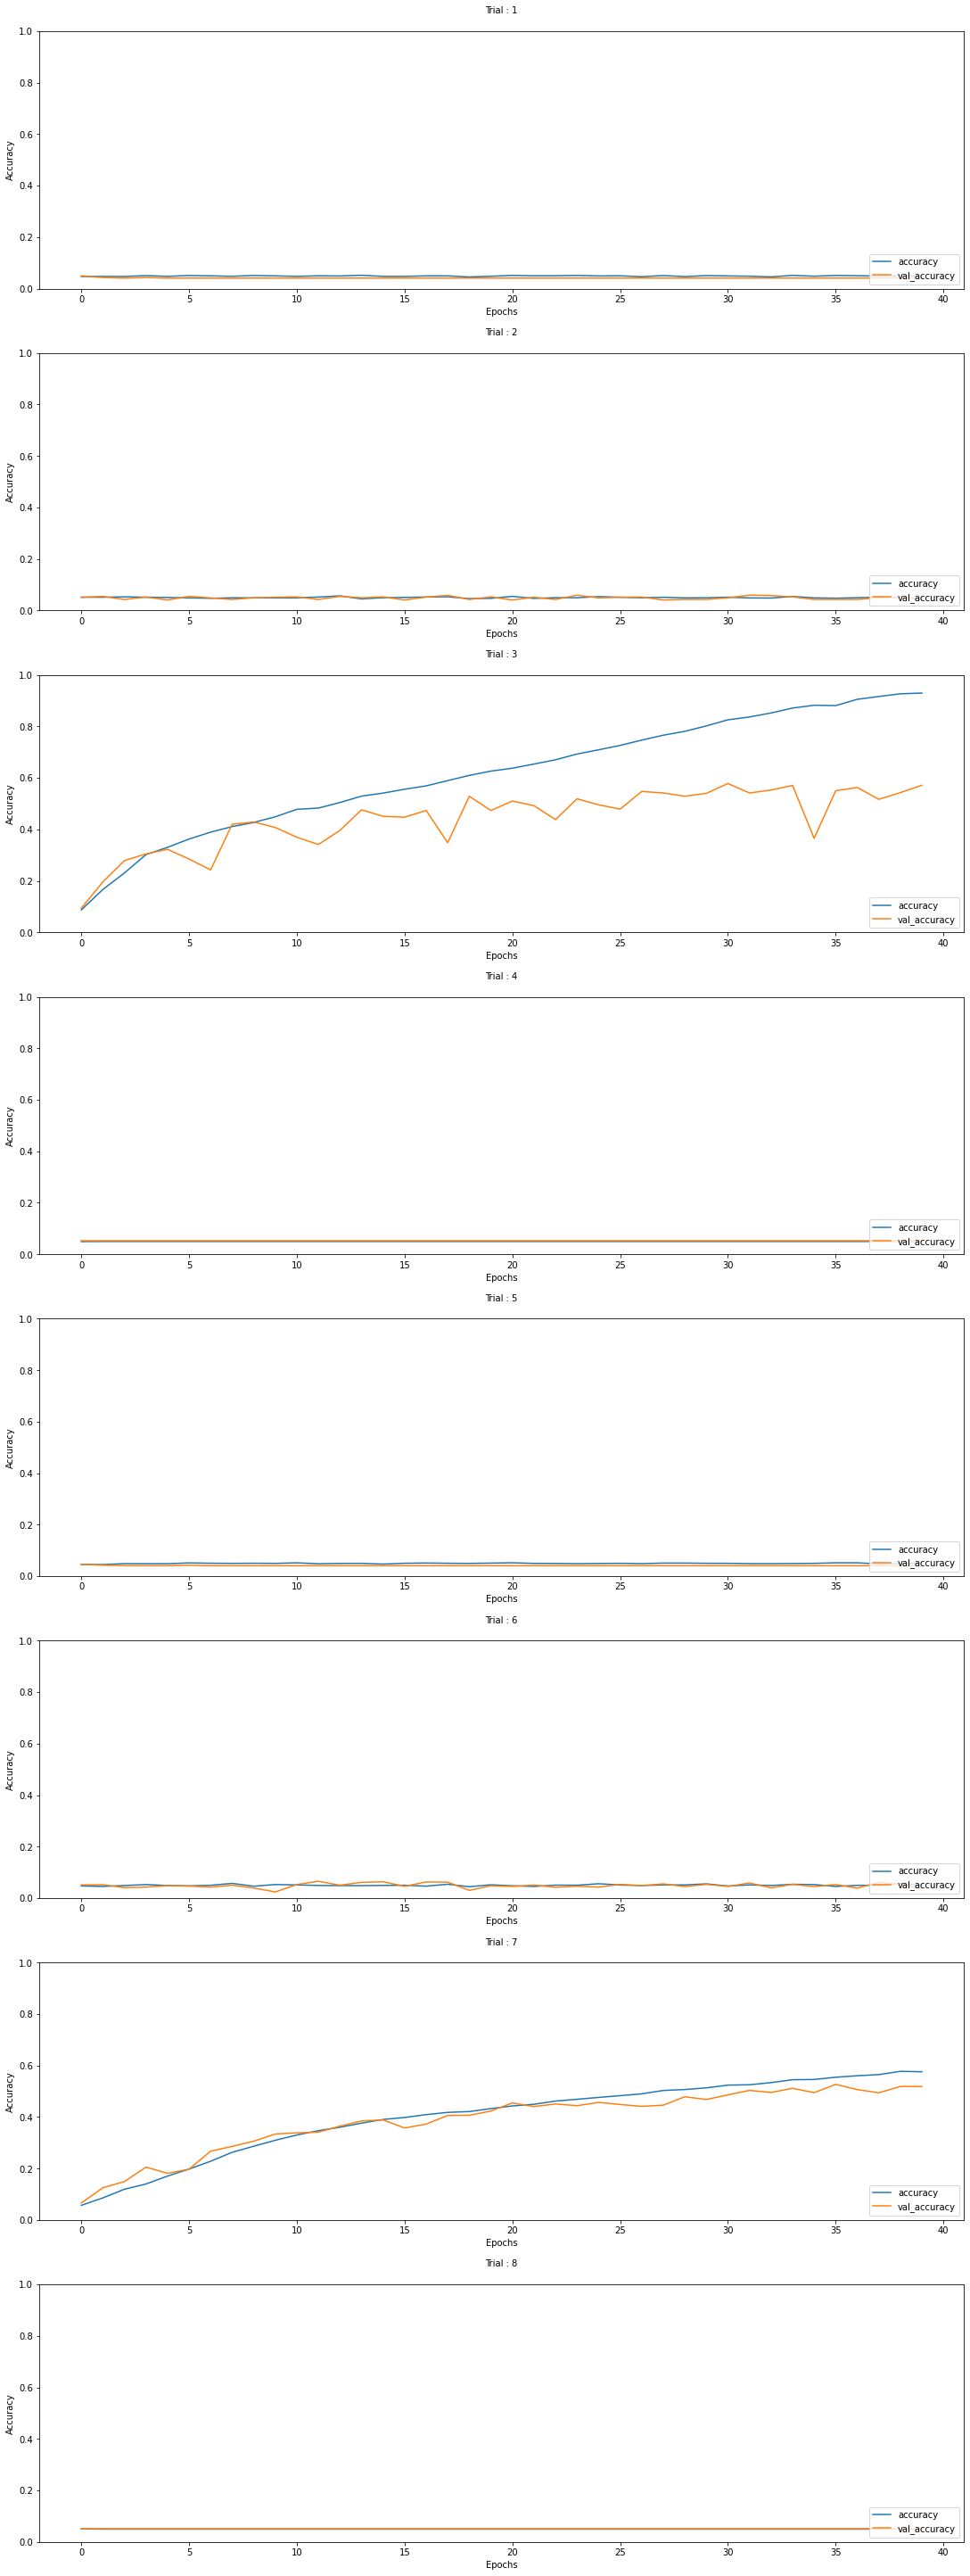

In [ ]:
cross_validation(alexNet,"alexNet",parameters)

#### VGG

In [ ]:
def vgg_block(num_convs, num_channels):
    blk = tf.keras.models.Sequential()
    for _ in range(num_convs):
        blk.add(tf.keras.layers.Conv2D(num_channels, kernel_size=3,
                                   padding='same', activation='relu'))
        blk.add(layers.BatchNormalization())
    blk.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    return blk

In [ ]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))

In [ ]:
def vgg(conv_arch):
    net = tf.keras.models.Sequential()
    # The convulational part
    for (num_convs, num_channels) in conv_arch:
        net.add(vgg_block(num_convs, num_channels))
    # The fully-connected part
    net.add(
        tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(4096, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(4096, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(20)]))
    return net



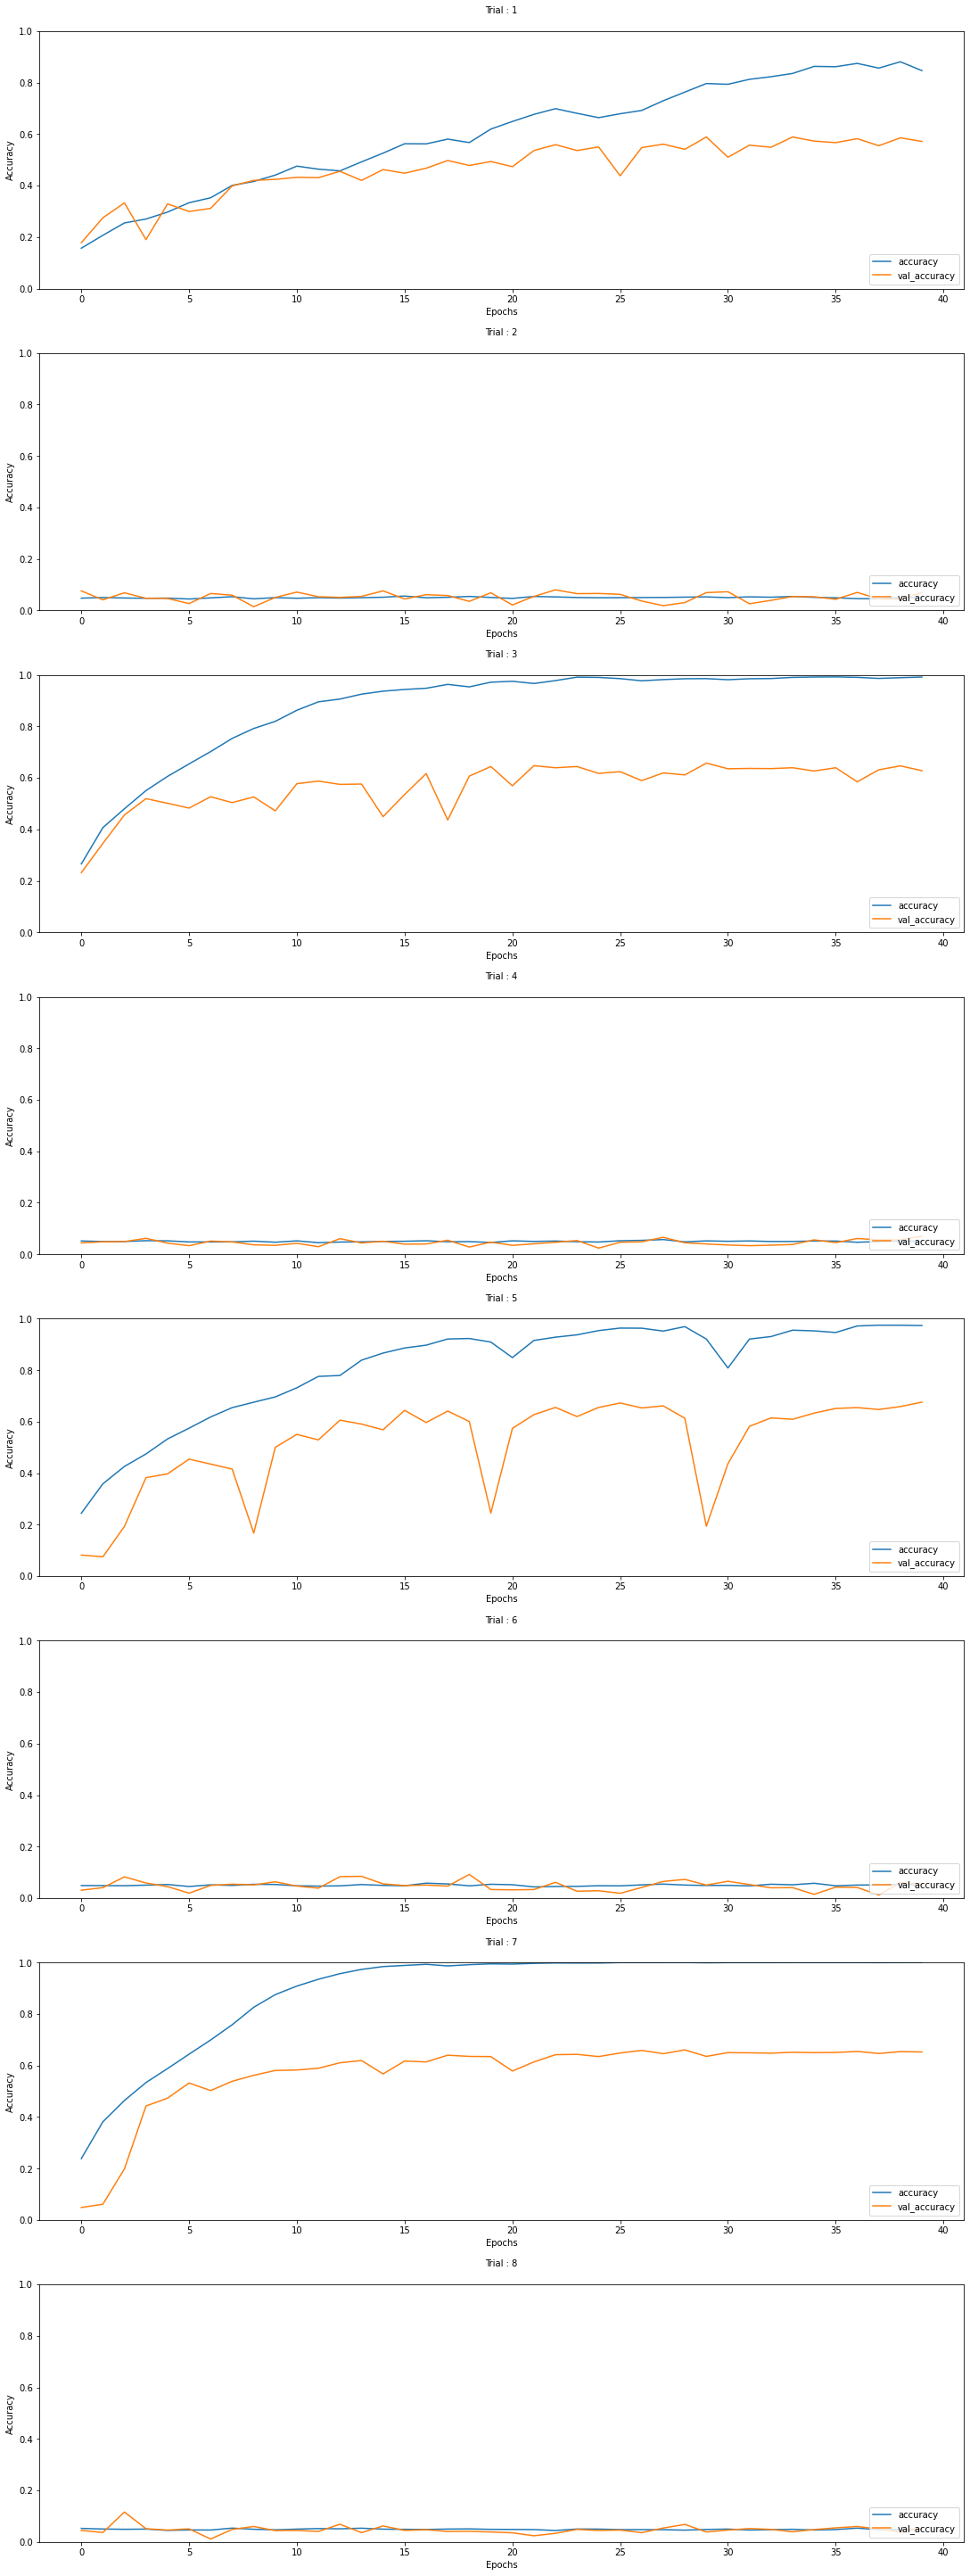

In [ ]:
plot_x = len(parameters)

figure, axis = plt.subplots(plot_x,constrained_layout=True,figsize=(15,5*plot_x))
for count, p in enumerate(parameters):
  compile_evaluate(vgg(conv_arch),'vgg',p['epochs'],p['batch_size'],p['optimizer'],p['loss'],p['trial'],axis[count])

plt.show()

#### MyCNN

In [ ]:
def my_cnn():
     return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=64, kernel_size=4, activation='relu',padding='same'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=128, kernel_size=5,activation='relu'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=256, kernel_size=5,activation='relu'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(300, activation='sigmoid'),
        tf.keras.layers.Dense(400, activation='sigmoid'),
        tf.keras.layers.Dense(20)])

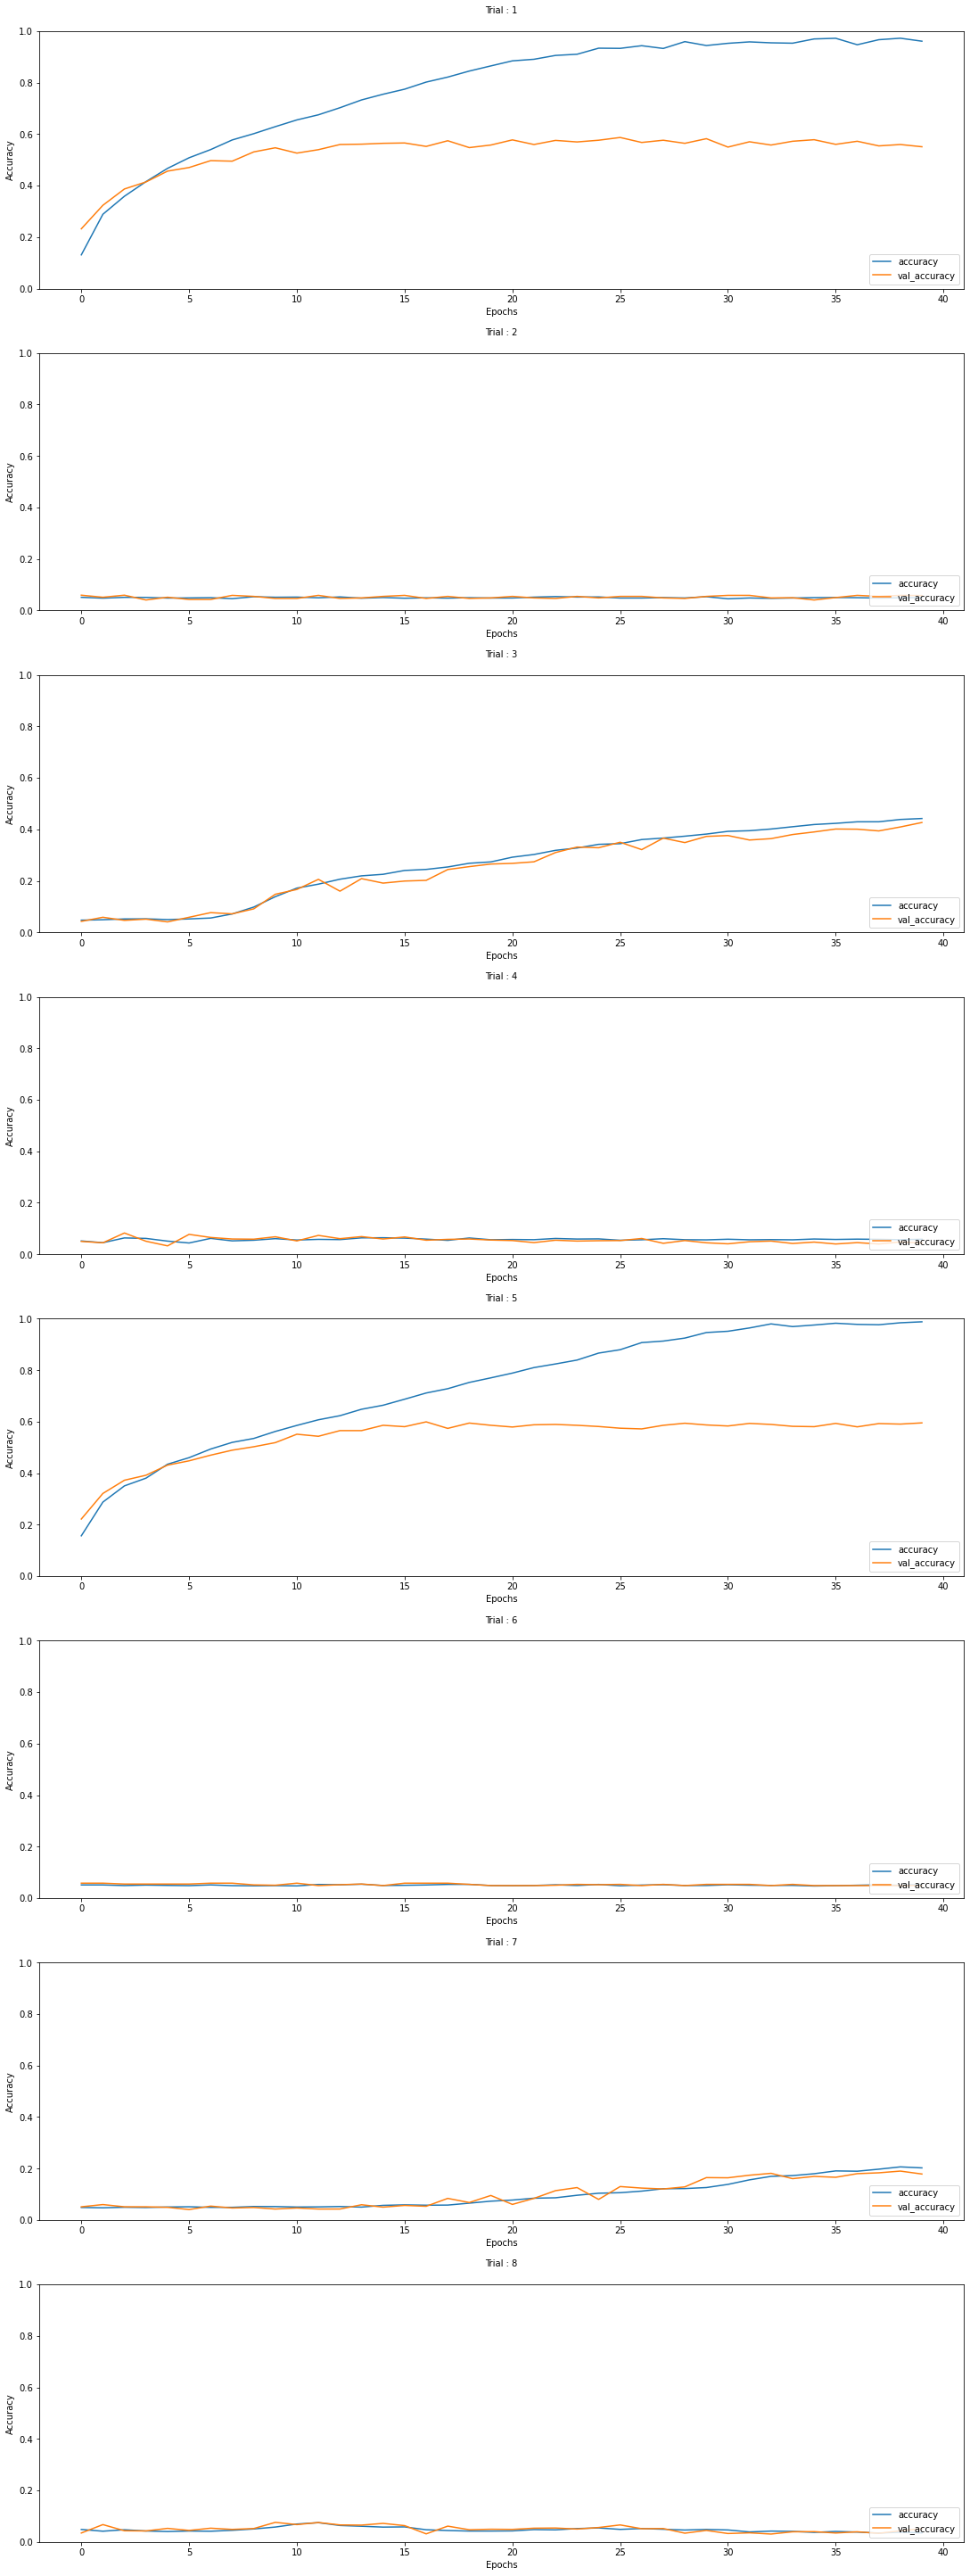

In [ ]:
cross_validation(my_cnn,"my_cnn",parameters)

### Βήμα 2:

Φτιάχνουμε μια συνάρτηση που διαβάει όλα τα files του κάθε μοντέλου από το drive  αποφασίζει με βάση το val_acccuracy ποιό είναι το καλύτερο.

In [ ]:
def find_best_model(model_name,return_parameters = False):
  max_acc = 0.0
  best_history = "NoNe"
  for file in os.listdir(foldername+model_name):
    with open(foldername+model_name+"/"+file, 'rb') as fp:
      history = pickle.load(fp) 
      if history['val_accuracy'][-1] > max_acc:
        max_acc = history['val_accuracy'][-1]
        best_history = history

  plt.plot(best_history['accuracy'], label='accuracy')
  plt.plot(best_history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0, 1.1])
  plt.legend(loc='lower right')

  print("Maximum Accuracy : ",max_acc)

  for key in best_history['parameters']:
    print('Optimal ',key," : ",best_history['parameters'][key])

  print("Test set accuracy :",best_history['test_accuracy'])

  if return_parameters:
    return best_history['parameters']


#### LeNet:

Maximum Accuracy :  0.468666672706604
Optimal  Epochs  :  40
Optimal  Batch size  :  16
Optimal  Optimizer  :  adam
Optimal  Loss  :  <keras.losses.SparseCategoricalCrossentropy object at 0x7f8f96dad210>
Test set accuracy : 0.4950000047683716


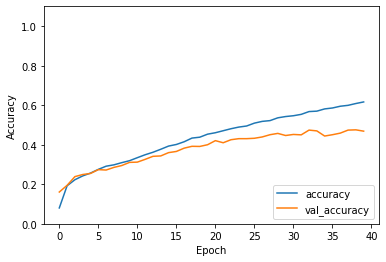

In [ ]:
find_best_model('leNet')

#### AlexNet:

Maximum Accuracy :  0.5713333487510681
Optimal  Epochs  :  40
Optimal  Batch size  :  16
Optimal  Optimizer  :  sgd
Optimal  Loss  :  <keras.losses.SparseCategoricalCrossentropy object at 0x7f8fa35b8190>
Test set accuracy : 0.5625


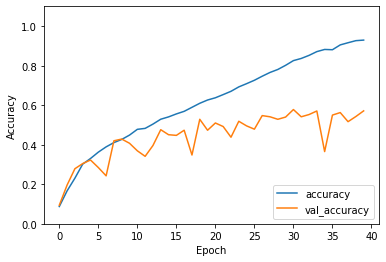

In [ ]:
find_best_model('alexNet')

#### VGG:

Maximum Accuracy :  0.6759999990463257
Optimal  Epochs  :  40
Optimal  Batch size  :  64
Optimal  Optimizer  :  adam
Optimal  Loss  :  <keras.losses.SparseCategoricalCrossentropy object at 0x7f8f99e3a350>
Test set accuracy : 0.6704999804496765


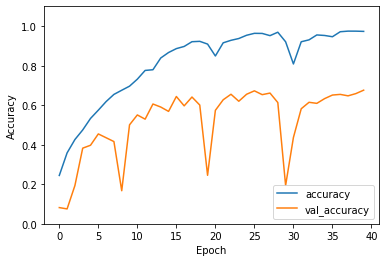

In [ ]:
find_best_model('vgg')

#### MyCNN:

Maximum Accuracy :  0.5953333377838135
Optimal  Epochs  :  40
Optimal  Batch size  :  64
Optimal  Optimizer  :  adam
Optimal  Loss  :  <keras.losses.SparseCategoricalCrossentropy object at 0x7f8f99d86b10>
Test set accuracy : 0.597000002861023


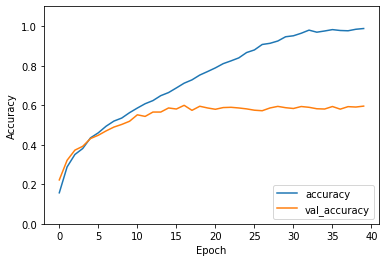

In [ ]:
find_best_model('my_cnn')

### Βήμα 3:

Παρατηρούμε ότι για το συγκεκριμένο dataset, το οποίο περιλαμβάνει 20 κλάσεις 
δεδομένων και αναλυτικά το πλήθος δεδομένων που φαίνεται παρακάτω\
Train: X=(8500, 32, 32, 3), y=(8500, 1) \
Validation: X=(1500, 32, 32, 3), y=(1500, 1) \
Test: X=(2000, 32, 32, 3), y=(2000, 1) \
Δεν πειράξαμε τις εποχές γιατί απο τα διαγράμματα είναι φανερό το πότε συμβαίνει over fitting , κάπου στις 20 εποχές και την επόμενη φορά που θα εκπαιδευτούν απλά θα βάλουμε λιγότερες
τα αποτελέσματα του accuracy όλων των μοντέλων ήταν ικανοποιητικά (της τάξης του 40%-70% περίπου). \
Επιπλέον, στα περισσότερα πειράματα έγινε χρήση του optimizer Adam, ενώ η δοκιμή του optimizer SGD βοήθησε μόνο στο ALEXnET
Τέλος, στα πειράματα χρησιμοποιήθηκαν τιμές batch size 16 και 64, με την αύξηση του δεν επηρεάζει ουσιαστικά τα αποτελέσματα των μοντέλων. Με διαφορά το καλύτερο μοντέλο ήταν το VGG


## Ερώτημα 2
---
### Βήμα 1: Έλεγχος υπερεκπαίδευσης

Για τον καλύτερο συνδυασμό που λάβατε από το Ερώτημα 1 για μοντέλο σας  (**MyCNN**) και μόνο, δοκιμάστε διάφορους συνδυασμούς των ακόλουθων τεχνικών για τον έλεγχο της υπερεκπαίδευσης (overfitting), όπως: 
- Πρόωρος τερματισμός (early stopping [tf.keras.callbacks.EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStoppinghttps://)) 

- Dropout ([Dropout](https://www.tensorflow.org/tutorials/images/classification#dropout))

- Επαύξηση δεδομένων ([Data augmentation](https://www.tensorflow.org/tutorials/images/classification#data_augmentation), [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#class_imagedatagenerator)) 

\\
, ώστε το μοντέλο σας να γενικεύει καλύτερα.

---
### Βήμα 2: Αξιολόγηση
Αξιολογήστε της ορθότητας για το validation και το test set σας.

### Βήμα 1:

Maximum Accuracy :  0.5953333377838135
Optimal  Epochs  :  40
Optimal  Batch size  :  64
Optimal  Optimizer  :  adam
Optimal  Loss  :  <keras.losses.SparseCategoricalCrossentropy object at 0x7f8f99e6a990>
Test set accuracy : 0.597000002861023


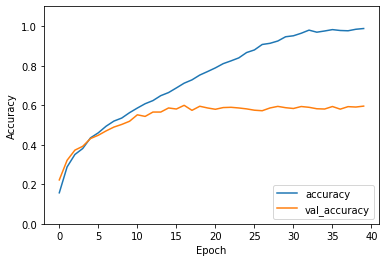

In [ ]:
best_my_cnn_params = find_best_model('my_cnn',True)

In [ ]:
print(best_my_cnn_params)

{'Epochs': 40, 'Batch size': 64, 'Optimizer': 'adam', 'Loss': <keras.losses.SparseCategoricalCrossentropy object at 0x7f8f99e6a990>}


In [ ]:
def best_parameters_tester(model,best_my_cnn_params,callbacks = []):
  model.compile(optimizer=best_my_cnn_params['Optimizer'],
              loss=best_my_cnn_params['Loss'],
              metrics=['accuracy'])

  history = model.fit(x_train, resized_y_train, epochs=best_my_cnn_params['Epochs'], batch_size=best_my_cnn_params['Batch size'],
                      validation_data=(x_val, resized_y_val), callbacks=callbacks)
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0, 1.1])
  plt.legend(loc='lower right')

  plt.show()
  

#### Δοκιμή του early stopping:

In [ ]:
#early_stopping = EarlyStopping()
custom_early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    patience=8, 
    min_delta=0.001, 
    mode='max'
)

Epoch 1/40
133/133 [==============================] - 2s 10ms/step - loss: 2.7065 - accuracy: 0.1456 - val_loss: 2.3901 - val_accuracy: 0.2333
Epoch 2/40
133/133 [==============================] - 1s 8ms/step - loss: 2.2316 - accuracy: 0.2901 - val_loss: 2.1248 - val_accuracy: 0.3220
Epoch 3/40
133/133 [==============================] - 1s 8ms/step - loss: 2.0008 - accuracy: 0.3589 - val_loss: 1.9326 - val_accuracy: 0.3860
Epoch 4/40
133/133 [==============================] - 1s 8ms/step - loss: 1.8694 - accuracy: 0.4036 - val_loss: 1.8795 - val_accuracy: 0.3813
Epoch 5/40
133/133 [==============================] - 1s 8ms/step - loss: 1.7774 - accuracy: 0.4287 - val_loss: 1.7788 - val_accuracy: 0.4133
Epoch 6/40
133/133 [==============================] - 1s 8ms/step - loss: 1.6470 - accuracy: 0.4759 - val_loss: 1.6793 - val_accuracy: 0.4720
Epoch 7/40
133/133 [==============================] - 1s 8ms/step - loss: 1.5408 - accuracy: 0.5148 - val_loss: 1.6759 - val_accuracy: 0.4767
Epoch

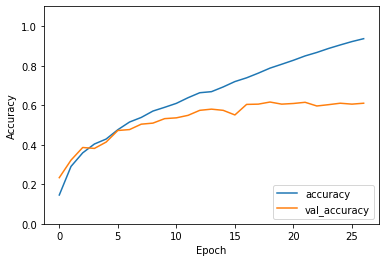

In [ ]:
best_parameters_tester(my_cnn(),best_my_cnn_params,callbacks = [custom_early_stopping])

#### Δοκιμή προσθήκης Dropout:

In [ ]:
def my_cnn_dropout():
     return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=64, kernel_size=4, activation='relu',padding='same'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=128, kernel_size=5,activation='relu'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=256, kernel_size=5,activation='relu'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(300, activation='sigmoid'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(400, activation='sigmoid'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(20)])

Epoch 1/40
133/133 [==============================] - 2s 11ms/step - loss: 2.8291 - accuracy: 0.1168 - val_loss: 2.5361 - val_accuracy: 0.1807
Epoch 2/40
133/133 [==============================] - 1s 9ms/step - loss: 2.3649 - accuracy: 0.2385 - val_loss: 2.1724 - val_accuracy: 0.2900
Epoch 3/40
133/133 [==============================] - 1s 8ms/step - loss: 2.1293 - accuracy: 0.3186 - val_loss: 2.0058 - val_accuracy: 0.3587
Epoch 4/40
133/133 [==============================] - 1s 9ms/step - loss: 1.9904 - accuracy: 0.3618 - val_loss: 1.9444 - val_accuracy: 0.3553
Epoch 5/40
133/133 [==============================] - 1s 9ms/step - loss: 1.9013 - accuracy: 0.3956 - val_loss: 1.7997 - val_accuracy: 0.4213
Epoch 6/40
133/133 [==============================] - 1s 8ms/step - loss: 1.7979 - accuracy: 0.4359 - val_loss: 1.7188 - val_accuracy: 0.4480
Epoch 7/40
133/133 [==============================] - 1s 9ms/step - loss: 1.7027 - accuracy: 0.4638 - val_loss: 1.6742 - val_accuracy: 0.4793
Epoch

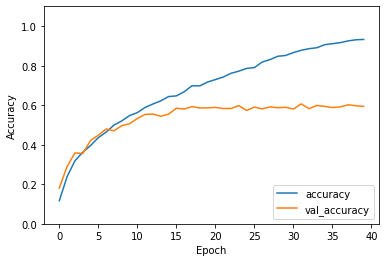

In [ ]:
best_parameters_tester(my_cnn_dropout(),best_my_cnn_params)

#### Δοκιμή Data Augmentation:

In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(32,
                                  32,
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ]
)


In [ ]:
def my_cnn_data_aug():
     return tf.keras.models.Sequential([
        data_augmentation,
        tf.keras.layers.Conv2D(filters=64, kernel_size=4, activation='relu',padding='same'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=128, kernel_size=5,activation='relu'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=256, kernel_size=5,activation='relu'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(300, activation='sigmoid'),
        tf.keras.layers.Dense(400, activation='sigmoid'),
        tf.keras.layers.Dense(20)])

Epoch 1/40
133/133 [==============================] - 2s 11ms/step - loss: 2.7296 - accuracy: 0.1432 - val_loss: 2.4044 - val_accuracy: 0.2407
Epoch 2/40
133/133 [==============================] - 1s 10ms/step - loss: 2.2692 - accuracy: 0.2758 - val_loss: 2.1815 - val_accuracy: 0.3247
Epoch 3/40
133/133 [==============================] - 1s 10ms/step - loss: 2.0639 - accuracy: 0.3435 - val_loss: 1.9877 - val_accuracy: 0.3480
Epoch 4/40
133/133 [==============================] - 1s 10ms/step - loss: 1.9955 - accuracy: 0.3548 - val_loss: 1.9624 - val_accuracy: 0.3667
Epoch 5/40
133/133 [==============================] - 1s 10ms/step - loss: 1.8928 - accuracy: 0.3898 - val_loss: 1.8429 - val_accuracy: 0.3933
Epoch 6/40
133/133 [==============================] - 1s 10ms/step - loss: 1.8131 - accuracy: 0.4219 - val_loss: 1.7854 - val_accuracy: 0.4447
Epoch 7/40
133/133 [==============================] - 1s 10ms/step - loss: 1.7262 - accuracy: 0.4461 - val_loss: 1.7737 - val_accuracy: 0.4267

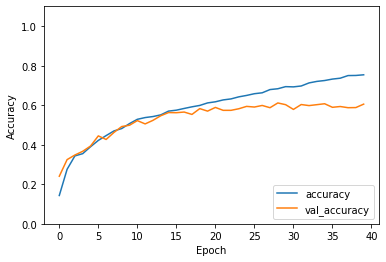

In [ ]:
best_parameters_tester(my_cnn_data_aug(),best_my_cnn_params)

### Βήμα 2:

Βλέπουμε ότι δεν υπάρχει πάρα πολύ μεγάλη διαφορά με την αρχική συμπεριφορά, με το val accuracy να βρίσκεται στο 0.6

## Ερώτημα 3
---
### Βήμα 1: Μεταφορά γνώσης
Εφαρμόστε μεταφορά γνώσης (transfer learning) στο δικό σας μοντέλο (**MyCNN**), που αξιολογήσατε ως καλύτερο προς την ακρίβεια στην αντιμετώπιση της υπερεκπαίδεσης. 

Για το transfer learning επιλέξτε το [VGG16](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16) για μεταφορά μάθησης.

1. "Παγώστε" τη συνελικτική βάση και εκπαιδεύστε την κεφαλή ταξινόμησης (classification head - σημαία trainable = False).  

2. Εκπαιδέστε μόνο ένα ποσοστό των επιπέδων, το οποίο βρίσκεται προς την έξοδο του δικτύου. Οι σημαίες trainable εδώ θα πρέπει να οριστούν ανά επίπεδο.

3. Αξιολογήστε τα αποτελέσματά σας, βάσει της ορθότητας του validation set και του test set σας.

Το μοντέλο mycnn2, το οποίο χρησιμοποιεί Dropout Layers, φάνηκε να αντιμετωπίζει βέλτιστα την υπερεκπαίδευση (εξίσου με το μοντέλο mycnn3 που χρησιμοποιεί και Data Augmentation), επομένως αυτό χρησιμοποιούμε για το ερώτημα που ακολουθεί.

#### 1.

"Πάγωμα" της συνελικτικής βάσης και εκπαίδευση την κεφαλή ταξινόμησης (classification head - σημαία trainable = False).

In [ ]:
pretrained_model = tf.keras.applications.VGG16(input_shape=(32,32,3), include_top=False)
pretrained_model.trainable = False

In [ ]:
def my_cnn_transfer():
     return tf.keras.models.Sequential([
        pretrained_model,
        # tf.keras.layers.Conv2D(filters=64, kernel_size=4, activation='relu',padding='same'),
        # tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        # tf.keras.layers.Conv2D(filters=128, kernel_size=5,activation='relu'),
        # tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        # tf.keras.layers.Conv2D(filters=256, kernel_size=5,activation='relu'),
        # tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(300, activation='sigmoid'),
        tf.keras.layers.Dense(400, activation='sigmoid'),
        tf.keras.layers.Dense(20)])

Epoch 1/40
133/133 [==============================] - 3s 17ms/step - loss: 2.5481 - accuracy: 0.2276 - val_loss: 2.0723 - val_accuracy: 0.3440
Epoch 2/40
133/133 [==============================] - 2s 15ms/step - loss: 1.8353 - accuracy: 0.4127 - val_loss: 1.7643 - val_accuracy: 0.4487
Epoch 3/40
133/133 [==============================] - 2s 15ms/step - loss: 1.5964 - accuracy: 0.4874 - val_loss: 1.5993 - val_accuracy: 0.4987
Epoch 4/40
133/133 [==============================] - 2s 15ms/step - loss: 1.4645 - accuracy: 0.5319 - val_loss: 1.5166 - val_accuracy: 0.5267
Epoch 5/40
133/133 [==============================] - 2s 15ms/step - loss: 1.3729 - accuracy: 0.5538 - val_loss: 1.4471 - val_accuracy: 0.5493
Epoch 6/40
133/133 [==============================] - 2s 15ms/step - loss: 1.3034 - accuracy: 0.5796 - val_loss: 1.4145 - val_accuracy: 0.5567
Epoch 7/40
133/133 [==============================] - 2s 15ms/step - loss: 1.2463 - accuracy: 0.5947 - val_loss: 1.3787 - val_accuracy: 0.5900

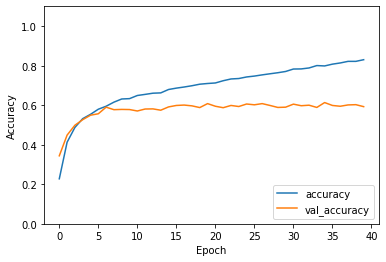

In [ ]:
best_parameters_tester(my_cnn_transfer(),best_my_cnn_params)

Παρατηρούμε ότι το transfer learning, επιδρά πολύ θετικά στο accuracy του μοντέλου, αφού υπήρξε μεγάλη αύξηση από 27% στο 55% σε σχέση με το mycnn2, δηλαδή με accuracy εξίσου καλό με το αρχικό mycnn που παρουσίαζε overfitting.

#### 2.

Εκπαίδευση μόνο ενός ποσοστού των επιπέδων, το οποίο βρίσκεται προς την έξοδο του δικτύου. Οι σημαίες trainable εδώ ορίζονται ανά επίπεδο.

Το πλήθος των layers του μοντέλου είναι:

In [ ]:
pretrained_model = tf.keras.applications.VGG16(input_shape=(32,32,3), include_top=False)


#Αρχικά θα δούμε πόσα Layers έχει το δίκτυο μας.
i = 1
for layer in pretrained_model.layers[:]:
  print("Layer",i)
  i=i+1

Layer 1
Layer 2
Layer 3
Layer 4
Layer 5
Layer 6
Layer 7
Layer 8
Layer 9
Layer 10
Layer 11
Layer 12
Layer 13
Layer 14
Layer 15
Layer 16
Layer 17
Layer 18
Layer 19


Επιλέγουμε να εκπαιδεύσουμε, μόνο τα τελευταία 7 layers του μοντέλου:

In [ ]:
i = 1
for layer in pretrained_model.layers[:]:
  if (i <= 12):
    print("Layer ",i," is not Trainable")
    layer.trainable = False 
  else:
    print("Layer ",i," is Trainable")
    layer.trainable = True
  i = i + 1

Layer  1  is not Trainable
Layer  2  is not Trainable
Layer  3  is not Trainable
Layer  4  is not Trainable
Layer  5  is not Trainable
Layer  6  is not Trainable
Layer  7  is not Trainable
Layer  8  is not Trainable
Layer  9  is not Trainable
Layer  10  is not Trainable
Layer  11  is not Trainable
Layer  12  is not Trainable
Layer  13  is Trainable
Layer  14  is Trainable
Layer  15  is Trainable
Layer  16  is Trainable
Layer  17  is Trainable
Layer  18  is Trainable
Layer  19  is Trainable


In [ ]:
def my_cnn_transfer_trainable():
     return tf.keras.models.Sequential([
        pretrained_model,
        # tf.keras.layers.Conv2D(filters=64, kernel_size=4, activation='relu',padding='same'),
        # tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        # tf.keras.layers.Conv2D(filters=128, kernel_size=5,activation='relu'),
        # tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        # tf.keras.layers.Conv2D(filters=256, kernel_size=5,activation='relu'),
        # tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(300, activation='sigmoid'),
        tf.keras.layers.Dense(400, activation='sigmoid'),
        tf.keras.layers.Dense(20)])

Epoch 1/40
133/133 [==============================] - 5s 29ms/step - loss: 3.0412 - accuracy: 0.0501 - val_loss: 3.0219 - val_accuracy: 0.0493
Epoch 2/40
133/133 [==============================] - 4s 28ms/step - loss: 3.0311 - accuracy: 0.0501 - val_loss: 3.0221 - val_accuracy: 0.0513
Epoch 3/40
133/133 [==============================] - 4s 28ms/step - loss: 3.0222 - accuracy: 0.0498 - val_loss: 3.0162 - val_accuracy: 0.0493
Epoch 4/40
133/133 [==============================] - 4s 28ms/step - loss: 3.0145 - accuracy: 0.0496 - val_loss: 3.0123 - val_accuracy: 0.0487
Epoch 5/40
133/133 [==============================] - 4s 28ms/step - loss: 3.0100 - accuracy: 0.0501 - val_loss: 3.0190 - val_accuracy: 0.0500
Epoch 6/40
133/133 [==============================] - 4s 28ms/step - loss: 3.0059 - accuracy: 0.0480 - val_loss: 3.0079 - val_accuracy: 0.0427
Epoch 7/40
133/133 [==============================] - 4s 28ms/step - loss: 3.0028 - accuracy: 0.0486 - val_loss: 3.0002 - val_accuracy: 0.0467

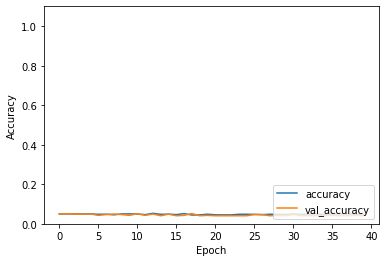

In [ ]:
best_parameters_tester(my_cnn_transfer_trainable(),best_my_cnn_params)

#### Αξιολόγηση αποτελεσμάτων:

Βλέπουμε φυσιολογικά αποτελέσματα στο πρώτο transfer learning, αλλά όταν προσπαθούμε να εκπαιδεύσουμε τις τελευταίες παραμέτρους έχουμε πολύ κακά αποτελέσματα.

## Διαχείριση μνήμης (TFRecord)
Η φόρτωση δεδομένων με τον τρόπο που το κάναμε παραπάνω στο απλό παράδειγμα υλοποίησης είναι πολύ βολική αλλά δεν είναι αποτελεσματική ως προς τη διαχείριση της μνήμης. Συγκεκριμένα, με τον τρόπο αυτό, τα δεδομένα αποθηκεύονται απευθείας σε μεταβλητές, οι οποίες όλες μαζί καταλαμβάνουν τη RAM της CPU ή της GPU, κάτι που κάνει αδύνατη τη διαχείριση μεγάλων datasets ή τον μεταχηματισμό των δεδομένων όπως όταν κάνουμε αύξηση δεδομένων (data augmentation).

Για να παρακαμφθεί αυτό το πρόβλημα, υπάρχει η δυνατότητα της σειριοποίησης των δεδομένων (serialization) και της αποθήκευσής τους σε αρχεία μεσαίου μεγέθους (κάποιων MB) τα οποία μπορούν να αναγνωστούν γραμμικά.

Το φορμάτ TFRecord είναι ένα φορμάτ που επιτρέπει την αποθήκευση σειράς δυαδικών εγγραφών. Διαβάστε σχετικά για το [TFRecord and tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord) και [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data). 

Σημειώστε ότι με τη μέθοδο αυτή θα πρέπει να γίνει import η `tensorflow_datasets` και να χρησιμοποιήσουμε την `tfds.load` ώστε να αποθηκευθεί το σύνολο δεδομένων σε αρχεία tfrecord στο δίσκο (δείτε [εδώ](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb) ένα παράδειγμα). Φυσικά μπορούμε να μετατρέψουμε και τα πρωτογενή δεδομένα (raw data) του dataset όπως αρχεία jpg σε φορματ tfrecord όπως [εδώ](https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d).
